## Pulling in S&P 500 stock data for ~5 year period to proof the pair-finding approach from 20190127 that seems to work with altcoins

Pulled a Kaggle dataset for this - not ideal, but very fast and should be good enough for this validation purpose: 
https://www.kaggle.com/camnugent/sandp500/version/4

In [1]:
#RUN FOR ALL PROCESSES#

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.listdir('/home/cynthiaorourke/Documents/Data/S_and_P_stocks/individual_stocks_5yr')
#used R's data.table package to bind these stocks in a stack and attach a name column pulled from the...
#... individual .csv file for each stock (R notes below)

['AXP_data.csv',
 'SYF_data.csv',
 'IVZ_data.csv',
 'AFL_data.csv',
 'RE_data.csv',
 'T_data.csv',
 'ZION_data.csv',
 'SEE_data.csv',
 'BK_data.csv',
 'PFG_data.csv',
 'EXR_data.csv',
 'CXO_data.csv',
 'FFIV_data.csv',
 'AWK_data.csv',
 'FOXA_data.csv',
 'GRMN_data.csv',
 'DUK_data.csv',
 'NWS_data.csv',
 'DVA_data.csv',
 'BF.B_data.csv',
 'BHF_data.csv',
 'CAG_data.csv',
 'MU_data.csv',
 'MMM_data.csv',
 'UAA_data.csv',
 'XLNX_data.csv',
 'ANTM_data.csv',
 'HOLX_data.csv',
 'WMT_data.csv',
 'AEE_data.csv',
 'M_data.csv',
 'SLG_data.csv',
 'ULTA_data.csv',
 'HCA_data.csv',
 'GPC_data.csv',
 'TPR_data.csv',
 'SPG_data.csv',
 'GS_data.csv',
 'GIS_data.csv',
 'SNPS_data.csv',
 'JNJ_data.csv',
 'HBI_data.csv',
 'CL_data.csv',
 'TMO_data.csv',
 'AMGN_data.csv',
 'PX_data.csv',
 'FIS_data.csv',
 'XL_data.csv',
 'PAYX_data.csv',
 'AVB_data.csv',
 'TXN_data.csv',
 'NFLX_data.csv',
 'ALB_data.csv',
 'NBL_data.csv',
 'AMP_data.csv',
 'COST_data.csv',
 'NFX_data.csv',
 'SWKS_data.csv',
 'CCL_data

R S&P500 stock compilation and labeling script:

#first make sure package data.table is installed
require(data.table) ## 1.9.2 or 1.9.3
filenames=list.files(path='/home/cynthiaorourke/Documents/Data/S_and_P_stocks/individual_stocks_5yr', full.names=TRUE)
full_SP <- rbindlist(lapply(filenames, fread))
#and so fast!!
write.csv(full_SP, file = '/home/cynthiaorourke/Documents/Data/full_SP.csv', row.names=FALSE)
# row.names = FALSE in R avoids that extra index addition bug

In [2]:
full_SP = pd.read_csv('/home/cynthiaorourke/Documents/Data/full_SP.csv', header = 0)

In [3]:
#shouldn't have to clean up an extra index row with the above modification of write.csv in R
full_SP['date_as_date'] =  pd.to_datetime(full_SP['date'], format='%Y-%m-%d')
print(full_SP.shape)
print(full_SP.iloc[0:3,:])
print(full_SP.iloc[5000:5003,:])
print(full_SP.iloc[50000:50003,:])
print(full_SP.iloc[500000:500003,:])
print(full_SP.dtypes)
#awesome, this is lovely, but date format needed to be revised (see above)

(619040, 8)
         date   open   high    low  close   volume Name date_as_date
0  2013-02-08  45.07  45.35  45.00  45.08  1824755    A   2013-02-08
1  2013-02-11  45.17  45.18  44.45  44.60  2915405    A   2013-02-11
2  2013-02-12  44.81  44.95  44.50  44.62  2373731    A   2013-02-12
            date    open    high     low   close    volume  Name date_as_date
5000  2017-12-15  173.63  174.17  172.46  173.97  40169307  AAPL   2017-12-15
5001  2017-12-18  174.88  177.20  174.86  176.42  29421114  AAPL   2017-12-18
5002  2017-12-19  175.03  175.39  174.09  174.54  27436447  AAPL   2017-12-19
             date   open    high    low  close   volume  Name date_as_date
50000  2017-06-15  91.43  92.090  91.09  91.73  2446105  ANDV   2017-06-15
50001  2017-06-16  91.82  92.470  91.31  92.43  2591117  ANDV   2017-06-16
50002  2017-06-19  92.59  93.015  92.18  92.77  3004469  ANDV   2017-06-19
              date   open   high    low  close  volume Name date_as_date
500000  2015-06-12  50.55  

In [4]:
#need a ROC variable within day
#it's still not really about asset value correlations, but asset change % in value correlations
#run it daily first:
full_SP['daily_ROC']=(full_SP['open']-full_SP['open'].shift(1))/full_SP['open'].shift(1)
print(full_SP.iloc[0:3,:])
print(full_SP.iloc[5000:5003,:])
print(full_SP.iloc[50000:50003,:])
print(full_SP.iloc[500000:500003,:])

         date   open   high    low  close   volume Name date_as_date  \
0  2013-02-08  45.07  45.35  45.00  45.08  1824755    A   2013-02-08   
1  2013-02-11  45.17  45.18  44.45  44.60  2915405    A   2013-02-11   
2  2013-02-12  44.81  44.95  44.50  44.62  2373731    A   2013-02-12   

   daily_ROC  
0        NaN  
1   0.002219  
2  -0.007970  
            date    open    high     low   close    volume  Name date_as_date  \
5000  2017-12-15  173.63  174.17  172.46  173.97  40169307  AAPL   2017-12-15   
5001  2017-12-18  174.88  177.20  174.86  176.42  29421114  AAPL   2017-12-18   
5002  2017-12-19  175.03  175.39  174.09  174.54  27436447  AAPL   2017-12-19   

      daily_ROC  
5000   0.007135  
5001   0.007199  
5002   0.000858  
             date   open    high    low  close   volume  Name date_as_date  \
50000  2017-06-15  91.43  92.090  91.09  91.73  2446105  ANDV   2017-06-15   
50001  2017-06-16  91.82  92.470  91.31  92.43  2591117  ANDV   2017-06-16   
50002  2017-06-19  9

In [5]:
a = 'A'
b = 'AAPL'
c = 'ANDV'

subset_stocks=full_SP[(full_SP['Name'] == a)|(full_SP['Name'] == b)|(full_SP['Name'] == c)]

In [6]:
#subset_stocks replaces subset_coins
#Name replaces slug
#open replaces monthly_ROC
#2017-12-15 replaces 2019-01-01 because the dataset is ~a year old and also the traditional markets are closed NYD
x = subset_stocks.daily_ROC.values
y = subset_stocks.daily_ROC[(subset_stocks['date_as_date']=='2017-12-15')].values
print(y)
print(y.shape)
yT=np.reshape(y,(1,3))
print(yT)
print(y) #ok, that worked - yT is a row, not a column
y=np.reshape(y,(3,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained!
print(subtractions,subtractions.shape)
print('Did that^ work?')

names = [_ for _ in subset_stocks.Name[(subset_stocks['date_as_date']=='2017-12-15')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#great! took some tweaking, but worked

[-0.00074705  0.00713457  0.00375905]
(3,)
[[-0.00074705  0.00713457  0.00375905]]
[-0.00074705  0.00713457  0.00375905]
[[ 0.         -0.00788162 -0.0045061 ]
 [ 0.00788162  0.          0.00337552]
 [ 0.0045061  -0.00337552  0.        ]] (3, 3)
Did that^ work?
             A      AAPL      ANDV
A     0.000000 -0.007882 -0.004506
AAPL  0.007882  0.000000  0.003376
ANDV  0.004506 -0.003376  0.000000


In [7]:
#now with the full full_SP set, but only on that one day:

x = full_SP.daily_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = full_SP.daily_ROC[(full_SP['date_as_date']=='2017-12-15')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach

names = [_ for _ in full_SP.Name[(full_SP['date_as_date']=='2017-12-15')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#very nice
#also very fast, which means this step at least may not be a hitch if I wanted to use daily cryptocoins measures...
#... rather than weekly averages (weighted or otherwise)

505
             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     0.000000 -0.002328  0.023130 -0.007882  0.002181 -0.025705 -0.000384   
AAL   0.002328  0.000000  0.025459 -0.005553  0.004509 -0.023377  0.001945   
AAP  -0.023130 -0.025459  0.000000 -0.031012 -0.020950 -0.048835 -0.023514   
AAPL  0.007882  0.005553  0.031012  0.000000  0.010062 -0.017823  0.007498   
ABBV -0.002181 -0.004509  0.020950 -0.010062  0.000000 -0.027886 -0.002564   
ABC   0.025705  0.023377  0.048835  0.017823  0.027886  0.000000  0.025321   
ABT   0.000384 -0.001945  0.023514 -0.007498  0.002564 -0.025321  0.000000   
ACN  -0.001228 -0.003557  0.021902 -0.009110  0.000952 -0.026933 -0.001612   
ADBE  0.006918  0.004589  0.030048 -0.000964  0.009098 -0.018787  0.006534   
ADI   0.011314  0.008986  0.034444  0.003433  0.013495 -0.014391  0.010931   
ADM  -0.002255 -0.004584  0.020875 -0.010137 -0.000075 -0.027960 -0.002639   
ADP   0.006985  0.004657  0.030116 -0.000896  0.009166 -0.01

In [8]:
#rank the column coins within row by closeness to the row index coin:
abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#print this to see proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,'...
#... but hypothetically keeps ranks sequential by i,i+1,i+2, etc.
#later it turns out now to, but there's a workaround down there
print(rank_abs_mins.iloc[0:9,0:9]) #each coin is rank 1 with itself, great
print('.at['',''] method',rank_abs_mins.at['AAPL','ABBV'])#ok, that's super handy, filing that trick away

          A    AAL    AAP   AAPL   ABBV    ABC    ABT    ACN   ADBE
A       1.0  100.0  249.0  224.0  103.0  252.0   18.0   68.0  217.0
AAL   117.0    1.0  304.0  159.0  193.0  196.0   89.0  163.0  140.0
AAP   475.0  482.0    1.0  489.0  473.0  492.0  476.0  474.0  486.0
AAPL  306.0  227.0  395.0    1.0  349.0  105.0  289.0  332.0   30.0
ABBV  109.0  186.0  194.0  285.0    1.0  308.0  128.0   47.0  280.0
ABC   483.0  475.0  489.0  423.0  487.0    1.0  483.0  486.0  441.0
ABT    22.0   82.0  260.0  213.0  118.0  241.0    1.0   87.0  203.0
ACN    56.0  139.0  224.0  251.0   55.0  278.0   75.0    1.0  247.0
ADBE  272.0  190.0  380.0   33.0  328.0  120.0  264.0  308.0    1.0
.at[,] method 349.0


In [9]:
target_coin='AAPL' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over that day:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['AAPL']

This is its closest ROC travel buddy or buddies over that day: ['AON' 'ED']

The next closest to AAPL : ['PG']

The third next closest to AAPL : ['FRT' 'QCOM']

Here are the coins that AAPL is least like: ['CSX']


In [10]:
#oh hey yo we have ground truths for this set!
#how close is AAPL to microsoft and facebook, over the course of this one day?

print('For AAPL, MSFT is its rank',rank_abs_mins.at['AAPL','MSFT'],'closest travel buddy on that date.')
print('For AAPL, FB is its rank',rank_abs_mins.at['AAPL','FB'],'closest travel buddy on that date.')
print('For MSFT, FB is its rank',rank_abs_mins.at['MSFT','FB'],'closest travel buddy on that date.')
print('For FB, MSFT is its rank',rank_abs_mins.at['FB','MSFT'],'closest travel buddy on that date.')
print('For AAPL, CSX is its rank',rank_abs_mins.at['AAPL','CSX'],'closest travel buddy on that date.')

For AAPL, MSFT is its rank 333.0 closest travel buddy on that date.
For AAPL, FB is its rank 102.0 closest travel buddy on that date.
For MSFT, FB is its rank 211.0 closest travel buddy on that date.
For FB, MSFT is its rank 251.0 closest travel buddy on that date.
For AAPL, CSX is its rank 396.0 closest travel buddy on that date.


## Ok, that works, which is glorious, but if going only on a single-day's data (for 2017-12-15), the clustering is... not great, as expected. Currently describes AAPL's closest buddies a British insurance brokerage (AON) and energy company Con Ed (ED), with MSFT at 333 and FB at 102.

## These ranks might be more interesting as percentage ranking, which Python might not reduce so much - I'd really rather see one rank assigned per coin across a row, and I don't think that's currently happening - CSX is AAPL's most distant partner, and yet ranks only 396 out of a 505-stock comparision set.

## Regardless, need to expand out to longer time frames - introduce weekly and monthly codes.

In [11]:
#adding weekly and monthly ROC values
#this is going to be a little glitchy because of holidays, weekends...
#... and other missing data in the traditional market data sets
#reducing the sample windows to account for some of that
#using the average across daily_ROC windows again, not the blunt force begin/end average

full_SP['weekly_avg_ROC']=full_SP['daily_ROC'].rolling(5,min_periods=5).mean()#remember that win_options allow for differential weighting...
full_SP['monthly_avg_ROC']=full_SP['daily_ROC'].rolling(20,min_periods=20).mean()#... across averaged span of time

print(full_SP.iloc[0:3,:])
print(full_SP.iloc[5000:5003,:])
print(full_SP.iloc[50000:50003,:])
print(full_SP.iloc[500000:500003,:])
#correct border issues? NaNs may throw errors later, probably better to have ROC set to 0 for beginning...
#... week and month of each coin's weekly_ROC and monthly_ROC
#or is it? wouldn't be hard to replace NaN values with zeroes, but let's not for now
#might be better to leave those coins out of weekly/monthly analyses until they age into them

         date   open   high    low  close   volume Name date_as_date  \
0  2013-02-08  45.07  45.35  45.00  45.08  1824755    A   2013-02-08   
1  2013-02-11  45.17  45.18  44.45  44.60  2915405    A   2013-02-11   
2  2013-02-12  44.81  44.95  44.50  44.62  2373731    A   2013-02-12   

   daily_ROC  weekly_avg_ROC  monthly_avg_ROC  
0        NaN             NaN              NaN  
1   0.002219             NaN              NaN  
2  -0.007970             NaN              NaN  
            date    open    high     low   close    volume  Name date_as_date  \
5000  2017-12-15  173.63  174.17  172.46  173.97  40169307  AAPL   2017-12-15   
5001  2017-12-18  174.88  177.20  174.86  176.42  29421114  AAPL   2017-12-18   
5002  2017-12-19  175.03  175.39  174.09  174.54  27436447  AAPL   2017-12-19   

      daily_ROC  weekly_avg_ROC  monthly_avg_ROC  
5000   0.007135        0.003691         0.000758  
5001   0.007199        0.006644         0.001159  
5002   0.000858        0.003329         0

In [12]:
#now with weekly ROCs:

x = full_SP.weekly_avg_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = full_SP.weekly_avg_ROC[(full_SP['date_as_date']=='2017-12-15')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach

names = [_ for _ in full_SP.Name[(full_SP['date_as_date']=='2017-12-15')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

505
             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     0.000000  0.001996 -0.006281 -0.003858 -0.005289 -0.011805 -0.001474   
AAL  -0.001996  0.000000 -0.008277 -0.005854 -0.007285 -0.013801 -0.003470   
AAP   0.006281  0.008277  0.000000  0.002423  0.000992 -0.005524  0.004807   
AAPL  0.003858  0.005854 -0.002423  0.000000 -0.001431 -0.007947  0.002384   
ABBV  0.005289  0.007285 -0.000992  0.001431  0.000000 -0.006516  0.003815   
ABC   0.011805  0.013801  0.005524  0.007947  0.006516  0.000000  0.010331   
ABT   0.001474  0.003470 -0.004807 -0.002384 -0.003815 -0.010331  0.000000   
ACN   0.003456  0.005452 -0.002825 -0.000402 -0.001833 -0.008349  0.001982   
ADBE  0.002845  0.004841 -0.003436 -0.001013 -0.002445 -0.008960  0.001371   
ADI  -0.000684  0.001312 -0.006965 -0.004542 -0.005973 -0.012489 -0.002158   
ADM  -0.006929 -0.004933 -0.013210 -0.010787 -0.012218 -0.018734 -0.008403   
ADP   0.002516  0.004512 -0.003765 -0.001342 -0.002773 -0.00

In [13]:
#rank the column coins within row by closeness to the row index coin:
abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#print this to see proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,'...
#... but hypothetically keeps ranks sequential by i,i+1,i+2, etc.
#later it turns out now to, but there's a workaround down there
print(rank_abs_mins.iloc[0:9,0:9]) #each coin is rank 1 with itself, great
print('Seeing how close of a partner ABBV is for AAPL under this new metric:',rank_abs_mins.at['AAPL','ABBV'])
#that is quite the rank change! nice

          A    AAL    AAP   AAPL   ABBV    ABC    ABT    ACN   ADBE
A       1.0  176.0  255.0  227.0  246.0  264.0  143.0  224.0  207.0
AAL   196.0    1.0  368.0  349.0  363.0  372.0  299.0  344.0  335.0
AAP   437.0  453.0    1.0  151.0   39.0   47.0  376.0  187.0  248.0
AAPL  342.0  401.0   66.0    1.0   55.0   94.0  222.0   22.0   89.0
ABBV  405.0  435.0   26.0   86.0    1.0   63.0  319.0  127.0  181.0
ABC   490.0  491.0  216.0  427.0  320.0    1.0  486.0  444.0  470.0
ABT   153.0  275.0  183.0  147.0  170.0  196.0    1.0  137.0  110.0
ACN   323.0  386.0   81.0   21.0   68.0  107.0  182.0    1.0   54.0
ADBE  284.0  365.0  102.0   49.0   88.0  124.0  135.0   36.0    1.0
Seeing how close of a partner ABBV is for AAPL under this new metric: 55.0


In [14]:
target_coin='AAPL' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over that day:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['AAPL']

This is its closest ROC travel buddy or buddies over that day: ['CHD']

The next closest to AAPL : ['FOXA' 'PEP']

The third next closest to AAPL : ['TMO']

Here are the coins that AAPL is least like: ['ADM' 'AJG' 'ALGN' 'APA' 'BEN' 'BLL' 'BWA' 'CSX' 'EIX' 'ETFC' 'FLS' 'GM'
 'GRMN' 'HBAN' 'IRM' 'ISRG' 'LRCX' 'MET' 'MU' 'NCLH' 'NLSN' 'NVDA' 'PPL'
 'PWR' 'QRVO' 'RL' 'ROP' 'SWKS' 'UNM' 'VMC' 'WHR' 'XL' 'ZION']


In [15]:
#oh hey yo we have ground truths for this set!
#how close is AAPL to microsoft and facebook, over the course of this one day?

print('Looking at FANG stocks only:')
print('For FB, AMZN is its rank',rank_abs_mins.at['FB','AMZN'],'closest travel buddy on that date.')
print('For AMZN, FB is its rank',rank_abs_mins.at['AMZN','FB'],'closest travel buddy on that date.')

print('For FB, NFLX is its rank',rank_abs_mins.at['FB','NFLX'],'closest travel buddy on that date.')
print('For NFLX, FB is its rank',rank_abs_mins.at['NFLX','FB'],'closest travel buddy on that date.')

print('For FB, GOOGL is its rank',rank_abs_mins.at['FB','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, FB is its rank',rank_abs_mins.at['GOOGL','FB'],'closest travel buddy on that date.')

print('For AMZN, NFLX is its rank',rank_abs_mins.at['AMZN','NFLX'],'closest travel buddy on that date.')
print('For NFLX, AMZN is its rank',rank_abs_mins.at['NFLX','AMZN'],'closest travel buddy on that date.')

print('For AMZN, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, AMZN is its rank',rank_abs_mins.at['GOOGL','AMZN'],'closest travel buddy on that date.')

print('For NFLX, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, NFLX is its rank',rank_abs_mins.at['GOOGL','MSFT'],'closest travel buddy on that date.')

print()
print('A stock most distant from AAPL, to define the upper bound of the range:')
print('For AAPL, ADM is its rank',rank_abs_mins.at['AAPL','ADM'],'closest travel buddy on that date.')

Looking at FANG stocks only:
For FB, AMZN is its rank 339.0 closest travel buddy on that date.
For AMZN, FB is its rank 301.0 closest travel buddy on that date.
For FB, NFLX is its rank 371.0 closest travel buddy on that date.
For NFLX, FB is its rank 393.0 closest travel buddy on that date.
For FB, GOOGL is its rank 356.0 closest travel buddy on that date.
For GOOGL, FB is its rank 344.0 closest travel buddy on that date.
For AMZN, NFLX is its rank 126.0 closest travel buddy on that date.
For NFLX, AMZN is its rank 169.0 closest travel buddy on that date.
For AMZN, GOOGL is its rank 75.0 closest travel buddy on that date.
For GOOGL, AMZN is its rank 76.0 closest travel buddy on that date.
For NFLX, GOOGL is its rank 75.0 closest travel buddy on that date.
For GOOGL, NFLX is its rank 93.0 closest travel buddy on that date.

A stock most distant from AAPL, to define the upper bound of the range:
For AAPL, ADM is its rank 410.0 closest travel buddy on that date.


In [16]:
## Ok, so that's terrible - this isn't clustering AAPL with other tech stocks very well, nor is it clustering...
## ... FANG stocks well, but it's nice to see that reciprocal ranks are pretty closely tied

In [17]:
#now with monthly ROCS:

x = full_SP.monthly_avg_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = full_SP.monthly_avg_ROC[(full_SP['date_as_date']=='2017-12-15')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach

names = [_ for _ in full_SP.Name[(full_SP['date_as_date']=='2017-12-15')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

505
             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     0.000000 -0.003924 -0.005545 -0.001134 -0.001775 -0.008496 -0.000323   
AAL   0.003924  0.000000 -0.001621  0.002790  0.002149 -0.004572  0.003602   
AAP   0.005545  0.001621  0.000000  0.004410  0.003770 -0.002952  0.005222   
AAPL  0.001134 -0.002790 -0.004410  0.000000 -0.000641 -0.007362  0.000812   
ABBV  0.001775 -0.002149 -0.003770  0.000641  0.000000 -0.006722  0.001452   
ABC   0.008496  0.004572  0.002952  0.007362  0.006722  0.000000  0.008174   
ABT   0.000323 -0.003602 -0.005222 -0.000812 -0.001452 -0.008174  0.000000   
ACN   0.002620 -0.001304 -0.002925  0.001485  0.000845 -0.005877  0.002297   
ADBE  0.000116 -0.003808 -0.005429 -0.001018 -0.001659 -0.008381 -0.000207   
ADI  -0.001665 -0.005589 -0.007209 -0.002799 -0.003440 -0.010161 -0.001987   
ADM   0.001561 -0.002363 -0.003984  0.000426 -0.000214 -0.006936  0.001238   
ADP   0.003361 -0.000563 -0.002183  0.002227  0.001586 -0.00

In [18]:
#rank the column coins within row by closeness to the row index coin:
abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#print this to see proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,'...
#... but hypothetically keeps ranks sequential by i,i+1,i+2, etc.
#later it turns out now to, but there's a workaround down there
print(rank_abs_mins.iloc[0:9,0:9]) #each coin is rank 1 with itself, great
print('Seeing how close of a partner ABBV is for AAPL under this new metric:',rank_abs_mins.at['AAPL','ABBV'])
#that is quite the rank change! nice

          A    AAL    AAP   AAPL   ABBV    ABC    ABT    ACN   ADBE
A       1.0  381.0  395.0  161.0  256.0  403.0   48.0  332.0   14.0
AAL   364.0    1.0   95.0  340.0  295.0  128.0  359.0  185.0  363.0
AAP   436.0  180.0    1.0  425.0  413.0   56.0  435.0  356.0  435.0
AAPL  126.0  289.0  318.0    1.0   96.0  327.0  103.0  213.0  115.0
ABBV  196.0  227.0  264.0   96.0    1.0  274.0  176.0  123.0  188.0
ABC   487.0  417.0  194.0  483.0  481.0    1.0  487.0  471.0  487.0
ABT    41.0  348.0  371.0  114.0  214.0  379.0    1.0  299.0   32.0
ACN   278.0  135.0  188.0  215.0  137.0  205.0  269.0    1.0  275.0
ADBE   14.0  372.0  389.0  147.0  244.0  397.0   29.0  323.0    1.0
Seeing how close of a partner ABBV is for AAPL under this new metric: 96.0


In [19]:
target_coin='AAPL' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over that day:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['AAPL']

This is its closest ROC travel buddy or buddies over that day: ['PLD' 'RHI']

The next closest to AAPL : ['COL' 'SWK']

The third next closest to AAPL : ['KHC']

Here are the coins that AAPL is least like: ['DISCA' 'DVA' 'FL' 'FOX' 'GPS' 'LB' 'M' 'VIAB']


In [20]:
#oh hey yo we have ground truths for this set!
#how close is AAPL to microsoft and facebook, over the course of this one day?

print('Looking at FANG stocks only:')
print('For FB, AMZN is its rank',rank_abs_mins.at['FB','AMZN'],'closest travel buddy on that date.')
print('For AMZN, FB is its rank',rank_abs_mins.at['AMZN','FB'],'closest travel buddy on that date.')

print('For FB, NFLX is its rank',rank_abs_mins.at['FB','NFLX'],'closest travel buddy on that date.')
print('For NFLX, FB is its rank',rank_abs_mins.at['NFLX','FB'],'closest travel buddy on that date.')

print('For FB, GOOGL is its rank',rank_abs_mins.at['FB','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, FB is its rank',rank_abs_mins.at['GOOGL','FB'],'closest travel buddy on that date.')

print('For AMZN, NFLX is its rank',rank_abs_mins.at['AMZN','NFLX'],'closest travel buddy on that date.')
print('For NFLX, AMZN is its rank',rank_abs_mins.at['NFLX','AMZN'],'closest travel buddy on that date.')

print('For AMZN, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, AMZN is its rank',rank_abs_mins.at['GOOGL','AMZN'],'closest travel buddy on that date.')

print('For NFLX, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, NFLX is its rank',rank_abs_mins.at['GOOGL','MSFT'],'closest travel buddy on that date.')

print()
print('A stock most distant from AAPL, to define the upper bound of the range:')
print('For AAPL, DISCA is its rank',rank_abs_mins.at['AAPL','DISCA'],'closest travel buddy on that date.')

Looking at FANG stocks only:
For FB, AMZN is its rank 282.0 closest travel buddy on that date.
For AMZN, FB is its rank 252.0 closest travel buddy on that date.
For FB, NFLX is its rank 110.0 closest travel buddy on that date.
For NFLX, FB is its rank 168.0 closest travel buddy on that date.
For FB, GOOGL is its rank 165.0 closest travel buddy on that date.
For GOOGL, FB is its rank 143.0 closest travel buddy on that date.
For AMZN, NFLX is its rank 285.0 closest travel buddy on that date.
For NFLX, AMZN is its rank 385.0 closest travel buddy on that date.
For AMZN, GOOGL is its rank 147.0 closest travel buddy on that date.
For GOOGL, AMZN is its rank 143.0 closest travel buddy on that date.
For NFLX, GOOGL is its rank 147.0 closest travel buddy on that date.
For GOOGL, NFLX is its rank 19.0 closest travel buddy on that date.

A stock most distant from AAPL, to define the upper bound of the range:
For AAPL, DISCA is its rank 328.0 closest travel buddy on that date.


## Monthly averaged ROCs are a little more even in their tech-stock-clumping and on median much lower in rank, which is good - so longer time spans are better, but there needs to be some sort of weighting to that rolling function or more high-resolution time-series measures rolled into those longer snapshots

## Time to revist Rubab's rolling window idea!

## But also keep in mind that the same time windows that work for traditional stocks may not be appropriate for crypto stocks

In [57]:
full_SP['yearly_average_ROC']=full_SP['daily_ROC'].rolling(261,min_periods=261).mean()#... across averaged span of time

print(full_SP.iloc[0:3,:])
print(full_SP.iloc[5000:5003,:])
print(full_SP.iloc[50000:50003,:])
print(full_SP.iloc[500000:500003,:])

         date   open   high    low  close   volume Name date_as_date  \
0  2013-02-08  45.07  45.35  45.00  45.08  1824755    A   2013-02-08   
1  2013-02-11  45.17  45.18  44.45  44.60  2915405    A   2013-02-11   
2  2013-02-12  44.81  44.95  44.50  44.62  2373731    A   2013-02-12   

   daily_ROC  weekly_avg_ROC  monthly_avg_ROC  yearly_avg_ROC  \
0        NaN             NaN              NaN             NaN   
1   0.002219             NaN              NaN             NaN   
2  -0.007970             NaN              NaN             NaN   

   yearly_average_ROC  yearly_median_ROC  
0                 NaN                NaN  
1                 NaN                NaN  
2                 NaN                NaN  
            date    open    high     low   close    volume  Name date_as_date  \
5000  2017-12-15  173.63  174.17  172.46  173.97  40169307  AAPL   2017-12-15   
5001  2017-12-18  174.88  177.20  174.86  176.42  29421114  AAPL   2017-12-18   
5002  2017-12-19  175.03  175.39  1

In [22]:
#now with yearly ROCS:

x = full_SP.yearly_avg_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = full_SP.yearly_avg_ROC[(full_SP['date_as_date']=='2017-12-15')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach

names = [_ for _ in full_SP.Name[(full_SP['date_as_date']=='2017-12-15')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

505
             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     0.000000  0.001190  0.003457 -0.000109 -0.000218  0.001019  0.000241   
AAL  -0.001190  0.000000  0.002267 -0.001299 -0.001408 -0.000172 -0.000949   
AAP  -0.003457 -0.002267  0.000000 -0.003566 -0.003675 -0.002438 -0.003215   
AAPL  0.000109  0.001299  0.003566  0.000000 -0.000109  0.001128  0.000350   
ABBV  0.000218  0.001408  0.003675  0.000109  0.000000  0.001237  0.000459   
ABC  -0.001019  0.000172  0.002438 -0.001128 -0.001237  0.000000 -0.000777   
ABT  -0.000241  0.000949  0.003215 -0.000350 -0.000459  0.000777  0.000000   
ACN  -0.000720  0.000471  0.002737 -0.000829 -0.000938  0.000299 -0.000478   
ADBE  0.000625  0.001816  0.004082  0.000516  0.000407  0.001644  0.000867   
ADI  -0.000765  0.000425  0.002692 -0.000874 -0.000983  0.000254 -0.000524   
ADM  -0.002078 -0.000888  0.001378 -0.002187 -0.002296 -0.001060 -0.001837   
ADP  -0.000846  0.000344  0.002611 -0.000955 -0.001064  0.00

In [23]:
#rank the column coins within row by closeness to the row index coin:
abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#print this to see proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,'...
#... but hypothetically keeps ranks sequential by i,i+1,i+2, etc.
#later it turns out now to, but there's a workaround down there
print(rank_abs_mins.iloc[0:9,0:9]) #each coin is rank 1 with itself, great
print('Seeing how close of a partner ABBV is for AAPL under this new metric:',rank_abs_mins.at['AAPL','ABBV'])
#that is quite the rank change! nice

          A    AAL    AAP   AAPL   ABBV    ABC    ABT    ACN   ADBE
A       1.0  420.0  458.0   19.0   26.0  396.0   72.0  314.0   41.0
AAL   306.0    1.0  193.0  306.0  307.0  105.0  300.0  241.0  311.0
AAP   495.0  490.0    1.0  495.0  495.0  491.0  495.0  493.0  495.0
AAPL   18.0  440.0  468.0    1.0   13.0  412.0  107.0  340.0   31.0
ABBV   37.0  450.0  476.0   18.0    1.0  428.0  135.0  361.0   23.0
ABC   248.0  100.0  251.0  248.0  249.0    1.0  239.0  145.0  253.0
ABT    42.0  380.0  436.0   51.0   57.0  340.0    1.0  247.0   64.0
ACN   158.0  221.0  336.0  163.0  163.0  179.0  142.0    1.0  166.0
ADBE  136.0  476.0  492.0   92.0   49.0  468.0  270.0  431.0    1.0
Seeing how close of a partner ABBV is for AAPL under this new metric: 13.0


In [24]:
target_coin='AAPL' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over that day:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['AAPL']

This is its closest ROC travel buddy or buddies over that day: ['ADSK' 'AMZN']

The next closest to AAPL : ['SNPS']

The third next closest to AAPL : ['CRM']

Here are the coins that AAPL is least like: ['AAP' 'ALK' 'APA' 'APC' 'AYI' 'CHK' 'CMG' 'CTL' 'DISCA' 'DISCK' 'DVN'
 'EQT' 'EVHC' 'FL' 'FLS' 'FTI' 'GE' 'HAL' 'HES' 'HLT' 'HOG' 'HP' 'HPE'
 'IPG' 'JCI' 'JWN' 'KIM' 'KMI' 'KR' 'M' 'MAT' 'NAVI' 'NBL' 'NFX' 'NWL'
 'OMC' 'PXD' 'RRC' 'SCG' 'SIG' 'SLB' 'TAP' 'TGT' 'TRIP' 'UA' 'UAA' 'ULTA'
 'VIAB' 'VNO' 'WBA' 'XEC' 'XRX']


In [59]:
#oh hey yo we have ground truths for this set!
#how close is AAPL to microsoft and facebook, over the course of this one day?

print('Looking at FANG stocks only:')
print('For FB, AMZN is its rank',rank_abs_mins.at['FB','AMZN'],'closest travel buddy on that date.')
print('For AMZN, FB is its rank',rank_abs_mins.at['AMZN','FB'],'closest travel buddy on that date.')

print('For FB, NFLX is its rank',rank_abs_mins.at['FB','NFLX'],'closest travel buddy on that date.')
print('For NFLX, FB is its rank',rank_abs_mins.at['NFLX','FB'],'closest travel buddy on that date.')

print('For FB, GOOGL is its rank',rank_abs_mins.at['FB','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, FB is its rank',rank_abs_mins.at['GOOGL','FB'],'closest travel buddy on that date.')

print('For AMZN, NFLX is its rank',rank_abs_mins.at['AMZN','NFLX'],'closest travel buddy on that date.')
print('For NFLX, AMZN is its rank',rank_abs_mins.at['NFLX','AMZN'],'closest travel buddy on that date.')

print('For AMZN, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, AMZN is its rank',rank_abs_mins.at['GOOGL','AMZN'],'closest travel buddy on that date.')

print('For NFLX, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, NFLX is its rank',rank_abs_mins.at['GOOGL','MSFT'],'closest travel buddy on that date.')

print()
print('A stock most distant from AAPL, to define the upper bound of the range:')
print('For AAPL, AAP is its rank',rank_abs_mins.at['AAPL','AAP'],'closest travel buddy on that date.')

Looking at FANG stocks only:
For FB, AMZN is its rank 79.0 closest travel buddy on that date.
For AMZN, FB is its rank 138.0 closest travel buddy on that date.
For FB, NFLX is its rank 107.0 closest travel buddy on that date.
For NFLX, FB is its rank 91.0 closest travel buddy on that date.
For FB, GOOGL is its rank 4.0 closest travel buddy on that date.
For GOOGL, FB is its rank 5.0 closest travel buddy on that date.
For AMZN, NFLX is its rank 251.0 closest travel buddy on that date.
For NFLX, AMZN is its rank 141.0 closest travel buddy on that date.
For AMZN, GOOGL is its rank 141.0 closest travel buddy on that date.
For GOOGL, AMZN is its rank 83.0 closest travel buddy on that date.
For NFLX, GOOGL is its rank 141.0 closest travel buddy on that date.
For GOOGL, NFLX is its rank 44.0 closest travel buddy on that date.

A stock most distant from AAPL, to define the upper bound of the range:
For AAPL, AAP is its rank 438.0 closest travel buddy on that date.


## Ok, that's good! Given a sufficiently large window, this approach will cluster the FANGS. 
So if there are crypto sectors, sufficiently large windows of time (or rolling averages of smaller windows of time over smaller "large" windows) should pull those out.
Will want to validate that assumption (smaller windows assumption) on the traditional stocks if you're applying it to the cryptos.
 
## Note that there are some 'defined' crytocurrency sectors by purpose, so that will be a good comparison points for any clusters you define by covariance (links saved in EC bookmark folder in Chrome). 

In [49]:
#looking at companies from within specific SNP sectors
#classified by sector and then subsector at https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
#predicted correlated sectors are drawn from pool of 11 total sectors:
#as of 10-2017: https://www.globalxfunds.com/cio-insights-sector-investing-and-correlations/

target_coin='AMD' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over that day:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['AMD']

This is its closest ROC travel buddy or buddies over that day: ['COO']

The next closest to AMD : ['COL' 'ROK']

The third next closest to AMD : ['BWA']

Here are the coins that AMD is least like: ['AAP' 'APA' 'APC' 'AYI' 'CHK' 'CMG' 'CTL' 'DISCA' 'DISCK' 'EQT' 'EVHC'
 'FL' 'GE' 'HES' 'HLT' 'HP' 'HPE' 'KIM' 'M' 'MAT' 'NAVI' 'NBL' 'NFX' 'NWL'
 'RRC' 'SCG' 'SIG' 'SLB' 'TRIP' 'UA' 'UAA' 'VNO' 'XRX']


In [46]:
print(68+64+30+68+61+69+25+32+26+28+33)
print(100*68/504,'infotech and - separately - financials')
print(100*64/504,'consumer discretionary')
print(100*30/504,'energy')
print(100*61/504,'healthcare')
print(100*69/504,'industrials')
print(100*25/504,'materials')
print(100*32/504,'real estate')
print(100*26/504,'comm services')
print(100*28/504,'utilities')
print(100*33/504,'consumer staples')

504
13.492063492063492 infotech and - separately - financials
12.698412698412698 consumer discretionary
5.9523809523809526 energy
12.103174603174603 healthcare
13.69047619047619 industrials
4.9603174603174605 materials
6.349206349206349 real estate
5.158730158730159 comm services
5.555555555555555 utilities
6.5476190476190474 consumer staples


drawing on https://www.barchart.com/stocks/indices/sp-sector/utilities, here's the SNP representation by sector:
68 infotech; 64 consumer discretionary; 30 energy; 68 financial; 61 healthcare; 69 industrials; 25 materials; 32 real estate; 26 comm services; 28 utilities; 33 consumer staples - that's an S&P 504 Index

note that some sectors are tightly correlated with other sectors as of 2017: https://www.globalxfunds.com/cio-insights-sector-investing-and-correlations/ - for example industrials corr with cons disc, financial, and materials at corr > 0.80 for each

#focal ARNC is industrials; PKG is materials; GLW is infotech; TMO is healthcare; CTAS is industrials
##that's a 25% matching while 14% of ecosystem matches

#focal BA is industrials; PYPL is infotech; VRTX is healthcare; ATVI is communications services; LRCX is infotech; DWDP is materials; ugh, 0% matching while 14% of ecosystem matches

#focal aerospace is now GD; EFX is industrials; HRL is consumer staples; BK is financials; DGX is healthcare; HBAN is financials; PCAR is industrials; 17% matching while 14% of ecosystem matches
#but 46.7% if including industrials/materials/consumerdisc/financials as one megasector, but that's 45% of the market

#let's switch sectors - something outside of this highly-correlated cluster to Utilities, which has no close corrs

#focal Utilities is AES; GPC is consumer discretionary; ALXN is healthcare; EOG is energy; GGP got aquired and isn't assigned a sector anymore; LEG is consumer discretionary; MRO is energy; 0% where 5.6% should match

#focal Utilities is LNT; AON is financials; CMS is utilities; BRK.B is financials; 33.33% where 5.6% should match

#focal Utilities is AEE; FIS is infotech; ZION is financials; TIF is consumer discretionary; LLL is industrials; BRK.B is financials; NOC is industrials; 0% where 5.6% should match

let's try infotech, which has a 72% corr with consumer discretionary - ACN, ADBE, and AMD

#focal ACN is infotech; BSX is healthcare; KSU is industrials; IFF is consumer discretionary; INFO is industrials; PNC is financials; INTC is infotech; 16.5% match where target is 13.5% match

#focal is ADBE; PHM is consumer discretionary; CBOE is financials; DHI is consumer discretionary; 0% where target is 13.5% match

#focal is AMD; COO is healthcare; ROK is industrials; BWA is consumer discretionary; 0% where target is 13.5%... why so many consumer discretionary? 33% across these three focals.

## Conclusion: this approach is not clustering sectors well. 

## Oh my, pandas has a rolling median option - that should be more robust; let's try it.

In [56]:
full_SP['yearly_median_ROC']=full_SP['daily_ROC'].rolling(261,min_periods=261).median()

print(full_SP.iloc[0:3,:])
print(full_SP.iloc[5000:5003,:])
print(full_SP.iloc[50000:50003,:])
print(full_SP.iloc[500000:500003,:])

         date   open   high    low  close   volume Name date_as_date  \
0  2013-02-08  45.07  45.35  45.00  45.08  1824755    A   2013-02-08   
1  2013-02-11  45.17  45.18  44.45  44.60  2915405    A   2013-02-11   
2  2013-02-12  44.81  44.95  44.50  44.62  2373731    A   2013-02-12   

   daily_ROC  weekly_avg_ROC  monthly_avg_ROC  yearly_avg_ROC  \
0        NaN             NaN              NaN             NaN   
1   0.002219             NaN              NaN             NaN   
2  -0.007970             NaN              NaN             NaN   

   yearly_average_ROC  yearly_median_ROC  
0                 NaN                NaN  
1                 NaN                NaN  
2                 NaN                NaN  
            date    open    high     low   close    volume  Name date_as_date  \
5000  2017-12-15  173.63  174.17  172.46  173.97  40169307  AAPL   2017-12-15   
5001  2017-12-18  174.88  177.20  174.86  176.42  29421114  AAPL   2017-12-18   
5002  2017-12-19  175.03  175.39  1

In [58]:
#now with yearly MEDIAN ROCs:

x = full_SP.yearly_median_ROC.values
#this was all to check that I was indeed selecting a numpy array and then a subsetted numpy array
y = full_SP.yearly_median_ROC[(full_SP['date_as_date']=='2017-12-15')].values
(m,)=y.shape
print(m)
yT=np.reshape(y,(1,m))
y=np.reshape(y,(m,1))

#then calculate a flat distance matrix for it:
subtractions = y-yT #that's is - that's the distance matrix with signs retained! also faster than pdist approach

names = [_ for _ in full_SP.Name[(full_SP['date_as_date']=='2017-12-15')]]
subtraction_matrix = pd.DataFrame(subtractions, index=names, columns=names)
print(subtraction_matrix)

#rank the column coins within row by closeness to the row index coin:
abs_mins=subtraction_matrix.abs()
abs_mins.idxmin(axis=0)#print this to see proof of concept works! each coin is in fact closest to itself
#maybe create a distance-based rank for each row and extract the index based on that?
rank_abs_mins=abs_mins.rank(axis=0,method='dense') #dense is like 'min,'...
#... but hypothetically keeps ranks sequential by i,i+1,i+2, etc.
#later it turns out now to, but there's a workaround down there
print(rank_abs_mins.iloc[0:9,0:9]) #each coin is rank 1 with itself, great
print('Seeing how close of a partner ABBV is for AAPL under this new metric:',rank_abs_mins.at['AAPL','ABBV'])
#that is quite the rank change! nice

505
             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     0.000000  0.002251  0.003643  0.000218  0.000562  0.000428  0.000674   
AAL  -0.002251  0.000000  0.001392 -0.002033 -0.001689 -0.001823 -0.001577   
AAP  -0.003643 -0.001392  0.000000 -0.003425 -0.003081 -0.003215 -0.002969   
AAPL -0.000218  0.002033  0.003425  0.000000  0.000344  0.000210  0.000456   
ABBV -0.000562  0.001689  0.003081 -0.000344  0.000000 -0.000134  0.000112   
ABC  -0.000428  0.001823  0.003215 -0.000210  0.000134  0.000000  0.000246   
ABT  -0.000674  0.001577  0.002969 -0.000456 -0.000112 -0.000246  0.000000   
ACN  -0.000619  0.001632  0.003024 -0.000401 -0.000057 -0.000191  0.000055   
ADBE  0.000456  0.002707  0.004099  0.000674  0.001018  0.000885  0.001130   
ADI  -0.001250  0.001001  0.002393 -0.001032 -0.000688 -0.000822 -0.000576   
ADM  -0.001806  0.000445  0.001837 -0.001588 -0.001244 -0.001378 -0.001132   
ADP  -0.001243  0.001008  0.002400 -0.001025 -0.000681 -0.00

In [60]:
#oh hey yo we have ground truths for this set!
#how close is AAPL to microsoft and facebook, over the course of this one day?

print('Looking at FANG stocks only:')
print('For FB, AMZN is its rank',rank_abs_mins.at['FB','AMZN'],'closest travel buddy on that date.')
print('For AMZN, FB is its rank',rank_abs_mins.at['AMZN','FB'],'closest travel buddy on that date.')

print('For FB, NFLX is its rank',rank_abs_mins.at['FB','NFLX'],'closest travel buddy on that date.')
print('For NFLX, FB is its rank',rank_abs_mins.at['NFLX','FB'],'closest travel buddy on that date.')

print('For FB, GOOGL is its rank',rank_abs_mins.at['FB','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, FB is its rank',rank_abs_mins.at['GOOGL','FB'],'closest travel buddy on that date.')

print('For AMZN, NFLX is its rank',rank_abs_mins.at['AMZN','NFLX'],'closest travel buddy on that date.')
print('For NFLX, AMZN is its rank',rank_abs_mins.at['NFLX','AMZN'],'closest travel buddy on that date.')

print('For AMZN, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, AMZN is its rank',rank_abs_mins.at['GOOGL','AMZN'],'closest travel buddy on that date.')

print('For NFLX, GOOGL is its rank',rank_abs_mins.at['AMZN','GOOGL'],'closest travel buddy on that date.')
print('For GOOGL, NFLX is its rank',rank_abs_mins.at['GOOGL','MSFT'],'closest travel buddy on that date.')

print()
print('A stock most distant from AAPL, to define the upper bound of the range:')
print('For AAPL, AAP is its rank',rank_abs_mins.at['AAPL','AAP'],'closest travel buddy on that date.')

Looking at FANG stocks only:
For FB, AMZN is its rank 79.0 closest travel buddy on that date.
For AMZN, FB is its rank 138.0 closest travel buddy on that date.
For FB, NFLX is its rank 107.0 closest travel buddy on that date.
For NFLX, FB is its rank 91.0 closest travel buddy on that date.
For FB, GOOGL is its rank 4.0 closest travel buddy on that date.
For GOOGL, FB is its rank 5.0 closest travel buddy on that date.
For AMZN, NFLX is its rank 251.0 closest travel buddy on that date.
For NFLX, AMZN is its rank 141.0 closest travel buddy on that date.
For AMZN, GOOGL is its rank 141.0 closest travel buddy on that date.
For GOOGL, AMZN is its rank 83.0 closest travel buddy on that date.
For NFLX, GOOGL is its rank 141.0 closest travel buddy on that date.
For GOOGL, NFLX is its rank 44.0 closest travel buddy on that date.

A stock most distant from AAPL, to define the upper bound of the range:
For AAPL, AAP is its rank 438.0 closest travel buddy on that date.


In [75]:
#that looks worse for the FANGs, huh

target_coin='AMD' #change this to reflect your coin of interest
subsetted_df=rank_abs_mins.loc[target_coin,:]
# print(subsetted_df[0:10])
# print(len(np.unique(subsetted_df)),np.isnan(subsetted_df).sum(),len(subsetted_df))
#^all of that was to fix a length issue arising from the new rolling mean calculation method - it's fixed
for_distances=subtraction_matrix.loc[target_coin,:]

n=len(subsetted_df)

for match in range(n):
    target_rank = np.unique(subsetted_df)[0] #this double-duties as a sanity check
    if subsetted_df[match]==target_rank:
        print('This is the coin of interest:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        break
print()   
for match in range(n):
    target_rank = np.unique(subsetted_df)[1]
    if subsetted_df[match]==target_rank:
        print('This is its closest ROC travel buddy or buddies over that day:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        #print('If the distance is positive,',target_coin,'did better than the closest traveler(s).')
        break
print()  
for match in range(n):
    target_rank = np.unique(subsetted_df)[2]
    if subsetted_df[match]==target_rank:
        print('The next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)#closer!
        #print('The ROC difference(s) at this level:',for_distances[for_distances == for_distances[match]].values)
        break
print()       
for match in range(n):
    target_rank = np.unique(subsetted_df)[3]
    if subsetted_df[match]==target_rank:
        print('The third next closest to',target_coin,':',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        #print(for_distances[for_distances == for_distances[match]])
        #print('If the distance is positive,',target_coin,'did better than these other coin(s).')
        break
print()  
for match in range(n):
    strangers = len(np.unique(subsetted_df))
    NaNs = np.isnan(subsetted_df).sum()
    target_rank = np.unique(subsetted_df)[strangers-NaNs-1]
    if subsetted_df[match]==target_rank:
        print('Here are the coins that',target_coin,'is least like:',subsetted_df[subsetted_df == subsetted_df[match]].index.values)
        break

This is the coin of interest: ['AMD']

This is its closest ROC travel buddy or buddies over that day: ['BBY' 'MA']

The next closest to AMD : ['SNPS']

The third next closest to AMD : ['HBI']

Here are the coins that AMD is least like: ['AAP' 'ALXN' 'APA' 'APC' 'AYI' 'AZO' 'C' 'CHK' 'CTL' 'CXO' 'DISCA'
 'DISCK' 'EQR' 'EQT' 'EVHC' 'FL' 'GE' 'GILD' 'HAL' 'HCP' 'HES' 'JCI' 'K'
 'KHC' 'KMI' 'LYB' 'M' 'MAC' 'MAT' 'MLM' 'NBL' 'NLSN' 'NOV' 'NUE' 'OXY'
 'PRGO' 'PXD' 'REGN' 'RRC' 'SCG' 'SLB' 'SNI' 'T' 'TJX' 'UA' 'UAA' 'UAL'
 'VMC' 'VNO' 'WBA']


note that some sectors are tightly correlated with other sectors as of 2017: https://www.globalxfunds.com/cio-insights-sector-investing-and-correlations/ 

for example INDUSTRIALS corr with cons disc, financial, and materials at corr > 0.80 for each

#focal ARNC is industrials; EXR is real estate; FLS is industrials; FAST is industrials; PFG is financials; that's a 50% matching while 14% of ecosystem matches

#focal BA is industrials; TROW is financial; SWKS is infotech; ADBE is infotech; WYN is cons D; 0% matching while 14% of ecosystem matches

#focal industrials is now GD; KR is cons S; COTY is cons S; INCY is health; ROK is industrials; CVX is energy; 20% match where target is 14%

overall for INDUSTRIALS 23% match in a 14% ecosystem - good for industrials

let's switch sectors - something outside of this highly-correlated cluster to UTILITIES, which has no close corrs

#focal Utilities is AES - with a median yearly ROC of 0, it clusters 1-to-1 with everything else at that level - no discernable pattern there so MEDIAN ZERO ROCs WOULD BE PROBLEMATIC

#focal Utilities is LNT; FIS is infotech; AEE is utils; BBT is financials; FFIV is infotech; 25% where 5.6% should match

#focal Utilities is AEE; PSX is E; FIS is health; LNT is utils; BBT is financials; 25% where 5.6% should match

#adding another Utility to replace AES - AEP; ZION is financial; MRO is E; MS is financial; UTX is industrial; FOXA is comm servs; MSI is infotech; 0% where 5.6% should match

#overall UTILITIES match of 14.29%, which is better than 5.6%

let's try INFOTECH, which has a 72% corr with consumer discretionary - ACN, ADBE, and AMD

#focal ACN is infotech; ORCL is infotech; RHI is industrial; ADSK is infotech; VLO is E; 50% match where target is 13.5% match

#focal is ADBE; SWKS is infotech; WYN is cons disc; BA is industrials; PHM is cons disc; TROW is fin; 20%% where target is 13.5% match (way up from 0% when using mean)

#focal is AMD; BBY is cons disc; MA is infotech; SNPS is infotech; HBI is cons disc; 50% where target is 13.5%

##overall INFOTECH match of 38.5% against a 13.5% ecosystem, and a lot of extra cons disc matches too - excellent

In [61]:
print(68+64+30+68+61+69+25+32+26+28+33)
print(100*68/504,'infotech and - separately - financials')
print(100*64/504,'consumer discretionary')
print(100*30/504,'energy')
print(100*61/504,'healthcare')
print(100*69/504,'industrials')
print(100*25/504,'materials')
print(100*32/504,'real estate')
print(100*26/504,'comm services')
print(100*28/504,'utilities')
print(100*33/504,'consumer staples')

504
13.492063492063492 infotech and - separately - financials
12.698412698412698 consumer discretionary
5.9523809523809526 energy
12.103174603174603 healthcare
13.69047619047619 industrials
4.9603174603174605 materials
6.349206349206349 real estate
5.158730158730159 comm services
5.555555555555555 utilities
6.5476190476190474 consumer staples


## Ok - median ROC is a good metric - it's worth finding a more systematic way to validate this
## Can you import sector data for these 500(+) stocks?
## Is it a better use of time to proof this against "known" coin sectors?
## Let's try k-means clustering on these S&P 500 stocks first
## aim for 11 clusters
## for features, use 1st of month median ROC measure for each stock
## assume no added relationship or sequence between months (at least at first) - see how well the model does

In [106]:
full_SP['monthly_median_ROC']=full_SP['daily_ROC'].rolling(20,min_periods=20).median()

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Trying to stack these in a wide format with 1st-of-month samples by date is not going well in Python.
Switching to R after first exporting data in current form as .csv.

In [109]:
full_SP.to_csv('/home/cynthiaorourke/Documents/Data/full_SP.csv', sep=',', encoding='utf-8')

library(dplyr)
library(tidyr)
full_SP <- read.csv("~/Documents/Data/full_SP.csv")
med_monthly_only<-full_SP #start off with a copy

med_monthly_only<-med_monthly_only%>%select(-c(X,date,open,high,low,close,volume,daily_ROC,weekly_avg_ROC))%>%
  select(-c(monthly_avg_ROC,yearly_avg_ROC,yearly_average_ROC,yearly_median_ROC))

#drop everything except first business day of each month in 2017
med_monthly_only<-med_monthly_only%>%
  filter(date_as_date %in% c('2017-01-03', '2017-02-01','2017-03-01','2017-04-03','2017-05-01','2017-06-01','2017-07-03','2017-08-01','2017-09-01','2017-10-02','2017-11-01','2017-12-01'))
  
wide_med_monthly_SP<-med_monthly_only%>%spread(date_as_date,monthly_median_ROC) 

NaNcount<-sum(is.na(wide_med_monthly_SP))
print(NaNcount) #there's only 26 of them
#get rid of names because they're strings and kmeans will hate that
wide_med_monthly_SP<-wide_med_monthly_SP%>%select(-c(Name))
#finally, replace NaNs with zeros (NOT optimal, but there aren't too many so hopefully it won't screw this up
wide_med_monthly_SP[is.na(wide_med_monthly_SP)] <- 0

#finally, write to .csv
write.csv(wide_med_monthly_SP, file = '/home/cynthiaorourke/Documents/Data/wide_med_monthly_SP.csv', row.names=FALSE)

In [179]:
#code to pull now wide data back in from R:
wide_med_monthly_SP = pd.read_csv('/home/cynthiaorourke/Documents/Data/wide_med_monthly_SP.csv', header = 0)

In [197]:
# print(wide_med_monthly_SP.iloc[0:2,:])
# print(wide_med_monthly_SP.iloc[50:52,:])
# print(wide_med_monthly_SP.iloc[500:502,:])

In [181]:
#X needs to be an array - all of the features minus the feature you are prediting, which you will...
#... have with stocks, but which you do not have with coins
#y can be left out for now, but you'll incorporate it with stocks

X_SP=wide_med_monthly_SP.values

print(type(X_SP))

#X = X_coins['4week_ROC'].reshape(-1, --1) 
print(X_SP.shape)

X=X_SP

#pre_X=X_coins['4week_ROC']

# X = np.array(train.drop(['Survived'], 1).astype(float))

<class 'numpy.ndarray'>
(504, 12)


In [199]:
kmeans = KMeans(n_clusters=11) 
kmeans.fit(X_SP) #oh yeah, it hates the names - go back and drop those
#kmeans.fit(monthly_coins)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

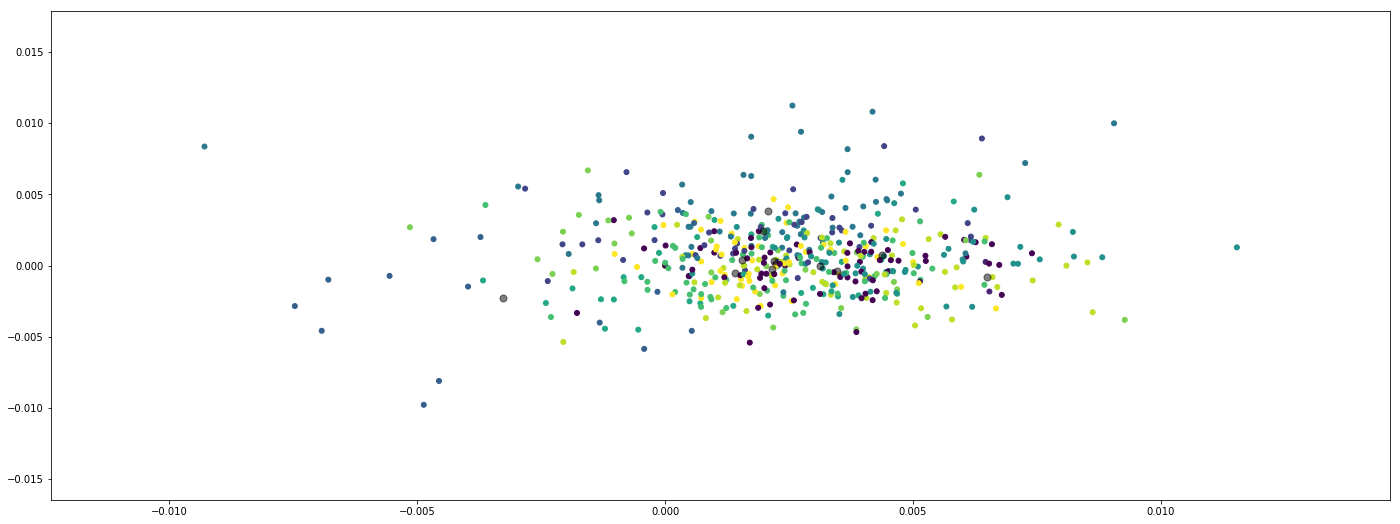

In [190]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 2], X[:, 1], c=y_kmeans, s=25, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 2], centers[:, 1], c='black', s=50, alpha=0.5);

Following along with this tutorial now: https://www.kaggle.com/arthurtok/principal-component-analysis-with-kmeans-visuals

In [136]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

#scaling vs not scaling has no effect on the outcome

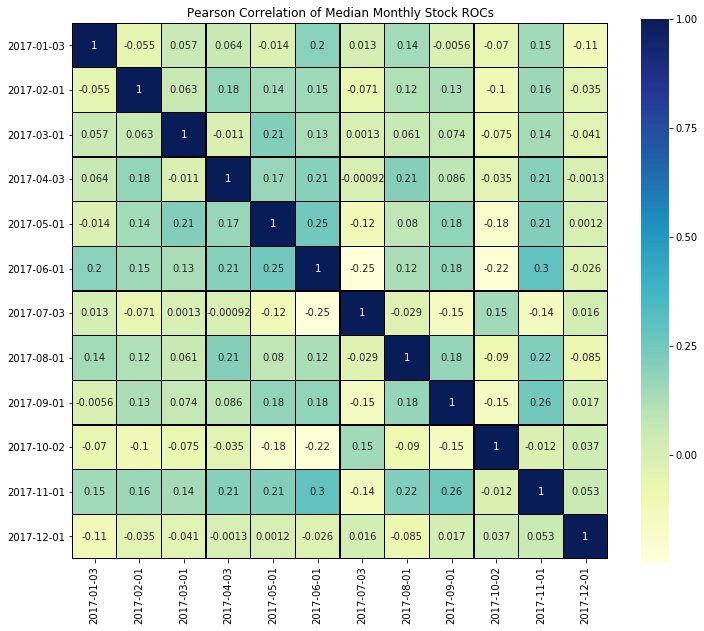

In [184]:
# Set up the matplotlib figure
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Median Monthly Stock ROCs')
# Draw the heatmap using seaborn
sns.heatmap(wide_med_monthly_SP.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [196]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print(eig_vals)
# print(eig_vecs)

In [186]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

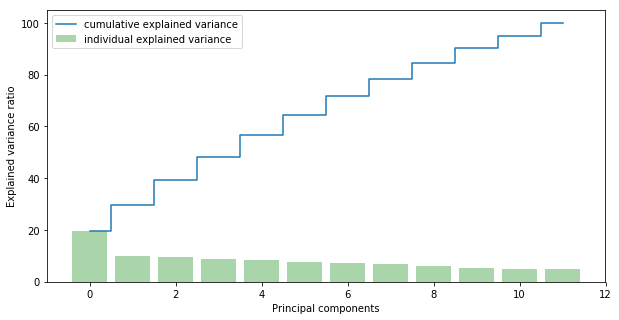

In [187]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(12), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(12), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
#plot indicates that we could explain ~95% of the variance with 11 principle components
#so this really isn't doing much to reduce feature dimensions

In [188]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11) 
x_11d = pca.fit_transform(X_std)

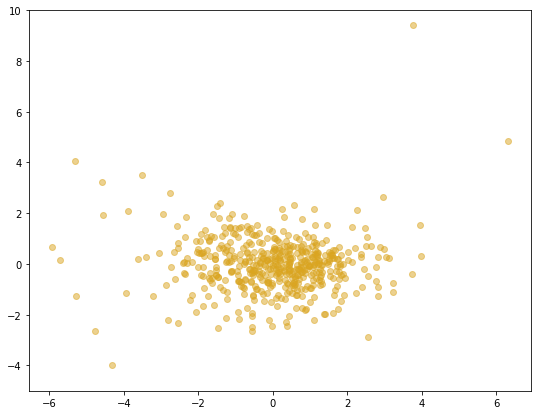

In [189]:
plt.figure(figsize = (9,7))
plt.scatter(x_11d[:,0],x_11d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-5,10)
plt.show()

#yeah, that doesn't exactly suggest clustering

Well, you could do this by daily ROC values - you have the R script.
That's a lot of features - more features than you have stocks. Will be interesting to see what PCA does with it.

##OK - PCA on every ROC for the year of 2017, let's do that thing.

Starting with R dplyr work:

##to do daily:
full_SP <- read.csv("~/Documents/Data/full_SP.csv")
daily_ROC<-full_SP #start off with a copy

daily_ROC<-daily_ROC%>%select(-c(X,date,open,high,low,close,volume,monthly_median_ROC,weekly_avg_ROC))%>%
  select(-c(monthly_avg_ROC,yearly_avg_ROC,yearly_average_ROC,yearly_median_ROC))

daily_ROC$date_as_date<-as.Date(daily_ROC$date_as_date)

#narrow down to 2017
daily_2017_ROC<-daily_ROC%>%
  filter(date_as_date >= ('2016-12-31') & date_as_date <= ('2018-01-01'))

wide_daily_2017_ROC<-daily_2017_ROC%>%spread(date_as_date,daily_ROC) #holy crap, that is crazy

NaNcount<-sum(is.na(wide_daily_2017_ROC))
print(NaNcount) #there's 725 of them
#keep the names - you can drop them later in python, but they're necessary to validate clusters
#wide_daily_2017_ROC<-wide_daily_2017_ROC%>%select(-c(Name))
#finally, replace NaNs with zeros (NOT optimal, but there aren't too many so hopefully it won't screw this up
wide_daily_2017_ROC[is.na(wide_daily_2017_ROC)] <- 0

#finally, write to .csv
write.csv(wide_daily_2017_ROC, file = '/home/cynthiaorourke/Documents/Data/wide_daily_2017_SP.csv', row.names=FALSE)

In [275]:
#code to pull now wide data back in from R:
wide_daily_SP = pd.read_csv('/home/cynthiaorourke/Documents/Data/wide_daily_2017_SP.csv', header = 0)

In [290]:
print(wide_daily_SP.iloc[50:52,:])
print(wide_daily_SP.iloc[500:502,:])
print(daily_clusters.iloc[50:52,:])
print(daily_clusters.iloc[500:502,:])

    Name  2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-09  \
50  ARNC   -0.002130    0.024546    0.026042    0.022843    0.021836   
51  ATVI   -0.002464    0.009056    0.019853    0.012000    0.003689   

    2017-01-10  2017-01-11  2017-01-12  2017-01-13  ...  2017-12-15  \
50   -0.019913    0.027255    0.009648    0.000478  ...   -0.003162   
51   -0.011027    0.021237    0.013517   -0.007951  ...    0.011901   

    2017-12-18  2017-12-19  2017-12-20  2017-12-21  2017-12-22  2017-12-26  \
50    0.015860   -0.002342    0.007042    0.022533    0.008739    0.009416   
51    0.024591   -0.014609   -0.011952   -0.012249    0.005426   -0.009559   

    2017-12-27  2017-12-28  2017-12-29  
50    0.010075    0.008496    0.011722  
51   -0.008873   -0.005183    0.003947  

[2 rows x 252 columns]
    Name  2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-09  \
500  XYL   -0.000600   -0.004805    0.009455   -0.003388   -0.009198   
501  YUM   -0.005788   -0.006451    0.00316

In [278]:
#need to drop the names column and then bring it back in later
wide_daily_X_only=wide_daily_SP.copy()
wide_daily_X_only.drop(wide_daily_X_only.columns[0], axis=1, inplace=True)

In [279]:
X_SP=wide_daily_X_only.values

print(type(X_SP))

#X = X_coins['4week_ROC'].reshape(-1, --1) 
print(X_SP.shape)

X=X_SP

<class 'numpy.ndarray'>
(505, 251)


In [280]:
kmeans = KMeans(n_clusters=11) 
kmeans.fit(X_SP) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

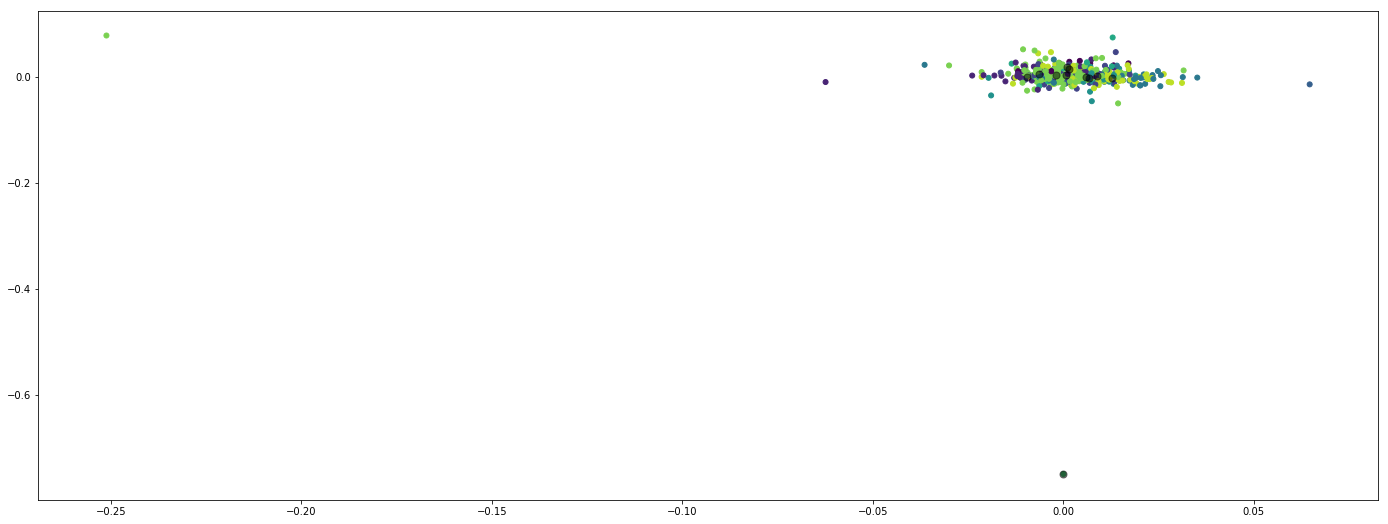

In [281]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
width = 24
length = 9
plt.rcParams['figure.figsize'] = (width, length)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

In [216]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

#scaling vs not scaling has no effect on the outcome
print(X_std)

[[ 1.50752324e-01  5.52757304e-01 -1.32219249e-01 ... -5.02140615e-01
   3.96642734e-01 -2.07069961e-01]
 [-2.84740262e-01 -4.41674465e-01 -4.62289097e-01 ...  7.25608864e-01
  -9.23180099e-01 -4.18418045e-01]
 [-2.97781147e-01 -1.23996952e-01 -1.06853724e-01 ...  7.90273818e-01
  -2.45386736e+00 -3.50193218e-01]
 ...
 [ 2.62153232e-01 -5.40895930e-02  1.48538054e-01 ... -4.93494097e-01
   1.44242950e-01  1.55324100e+00]
 [ 9.24172604e-01 -2.42402640e-01  4.22375830e-01 ... -1.43803275e+00
   3.09303365e-01  6.86562499e-01]
 [ 2.00343425e-01 -1.39921583e-01  2.21036162e-01 ... -1.62572457e-03
  -2.33626032e-01 -2.16031880e-01]]


In [218]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

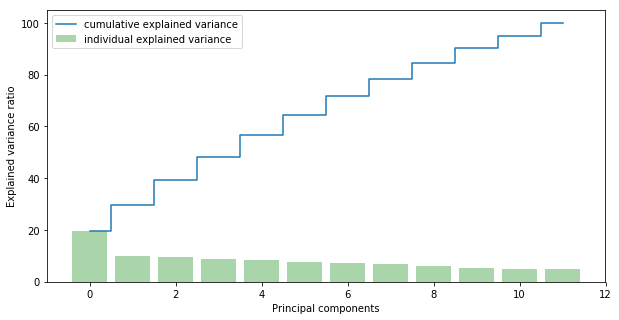

In [219]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(12), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(12), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
#plot indicates that we could explain ~95% of the variance with 12 principle components
#so this really isn't doing much to reduce feature dimensions

In [222]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12) 
x_12d = pca.fit_transform(X_std)

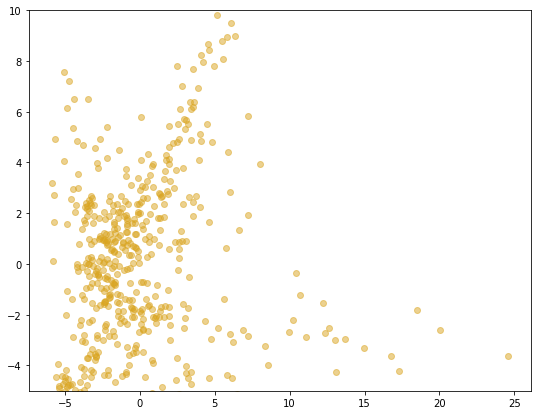

In [223]:
plt.figure(figsize = (9,7))
plt.scatter(x_12d[:,0],x_12d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-5,10)
plt.show()

#yeah, that doesn't exactly suggest clustering

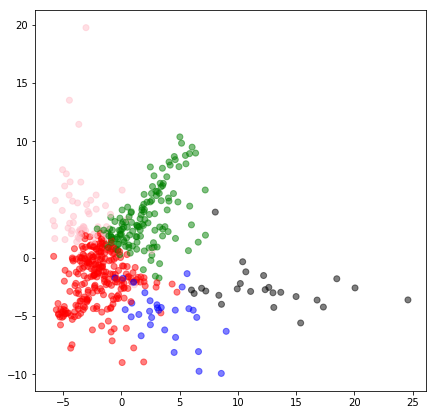

In [288]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=5)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_12d)

# Define our own color map
LABEL_COLOR_MAP = {0:'r',1:'g',2:'b',3:'black',4:'pink',5 :'yellow', 6:'purple',7:'grey',8:'goldenrod',9:'goldenrod',10:'goldenrod',11:'goldenrod'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_12d[:,0],x_12d[:,1], c= label_color, alpha=0.5) 
plt.show()

In [289]:
# Create a temp dataframe from our PCA projection data "x_9d"
daily_clusters = pd.DataFrame(x_12d)
daily_clusters = daily_clusters[[0,1,2,3,4,5,6,7,8,9,10,11]] # only want to visualise relationships between first 3 projections
daily_clusters['X_cluster'] = X_clustered
daily_clusters['Name']=wide_daily_SP['Name']
print(daily_clusters)


             0         1         2         3         4         5         6  \
0    -3.535065  2.148936 -0.059390  1.188392  0.631070 -2.392559  0.666456   
1     0.866361  3.036358  5.297418  2.764368 -2.540711 -0.728096 -9.963445   
2     3.709738 -6.192064  6.039959 -0.492807  0.400705 -1.802502 -0.757739   
3    -1.800258  2.326072 -2.103567  2.352567  0.617536 -0.671718  1.801147   
4    -3.192400 -0.752375  0.508975 -0.529550  3.232268 -2.880576  0.361426   
5    -2.071649 -2.839959  2.632963  2.267676  5.020896 -0.452232 -1.041509   
6    -2.399263  0.078820  0.829763  0.180829  1.900113 -1.754996  0.942270   
7    -2.747231  0.125811 -0.347758 -0.829841 -1.919327 -0.693866 -0.488842   
8    -5.876437  3.185025 -2.189610  2.991054 -0.663484 -0.976514  1.623944   
9    -2.179451  5.385527 -2.358863  3.301601 -3.272751  1.538961  1.892498   
10   -0.381018 -2.088839  0.545718 -0.889884 -1.585774  1.257297  1.839664   
11   -1.951968 -0.619129  0.177529 -1.659644 -0.953640  0.981729

/home/cynthiaorourke/Envs/datamode/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/cynthiaorourke/Envs/datamode/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/cynthiaorourke/Envs/datamode/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


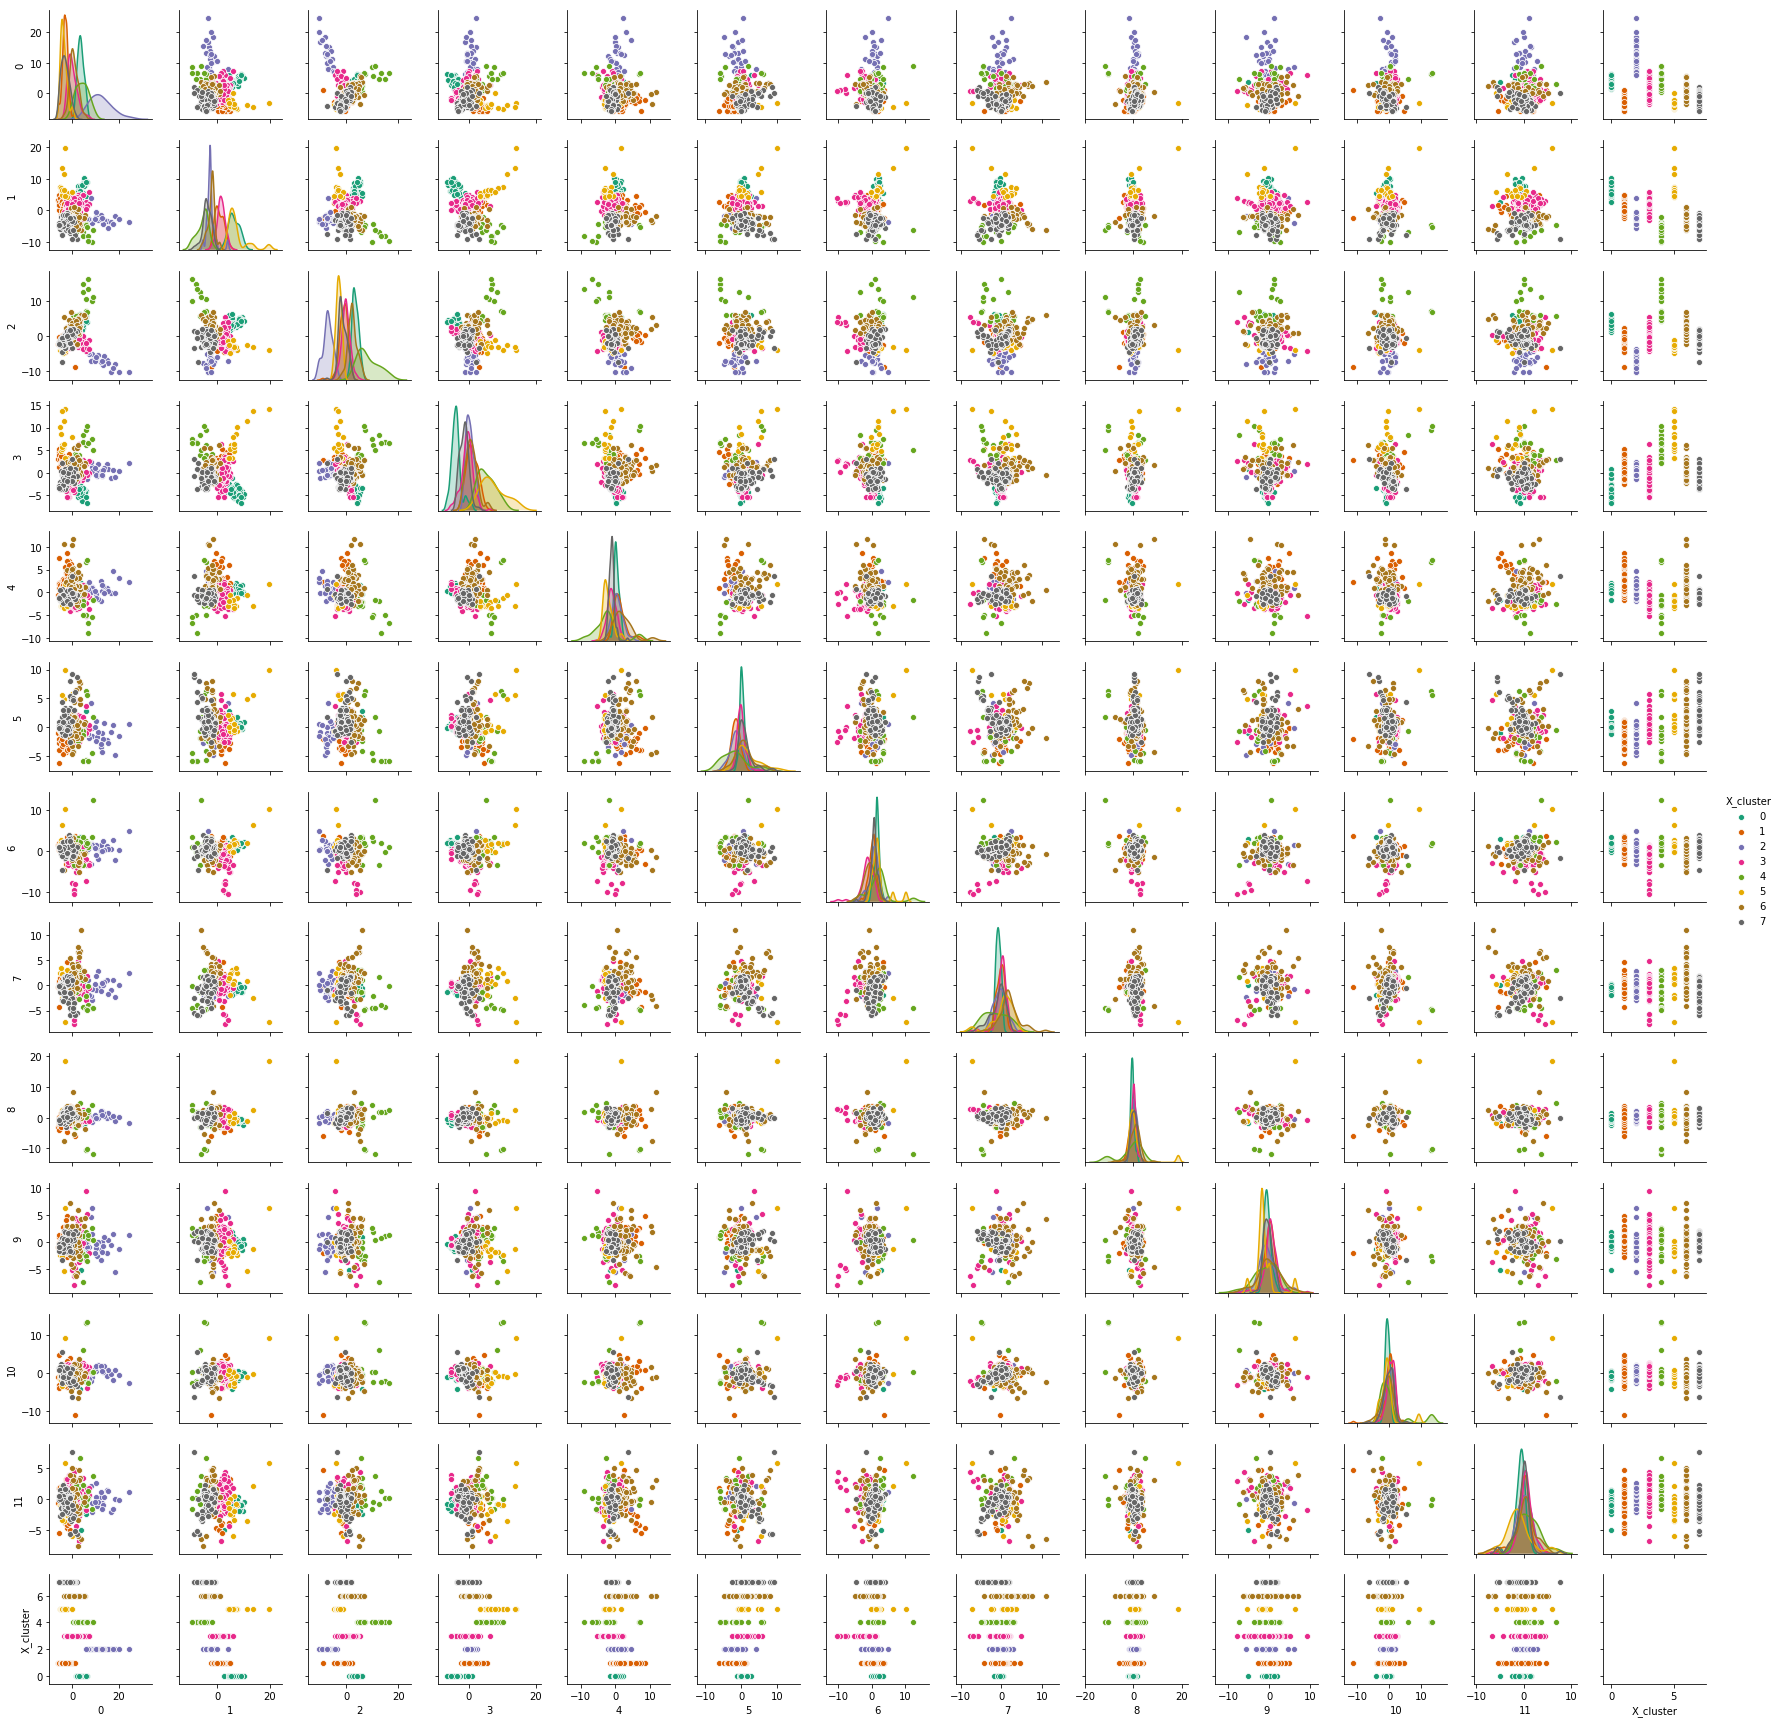

In [254]:
sns.pairplot(daily_clusters, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [255]:
# Create a temp dataframe from our PCA projection data "x_9d"
daily_clusters = pd.DataFrame(x_12d)
daily_clusters = daily_clusters[[0,1,2,3]] # really only separation through the first 4 dimensions, so
daily_clusters['X_cluster'] = X_clustered

/home/cynthiaorourke/Envs/datamode/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


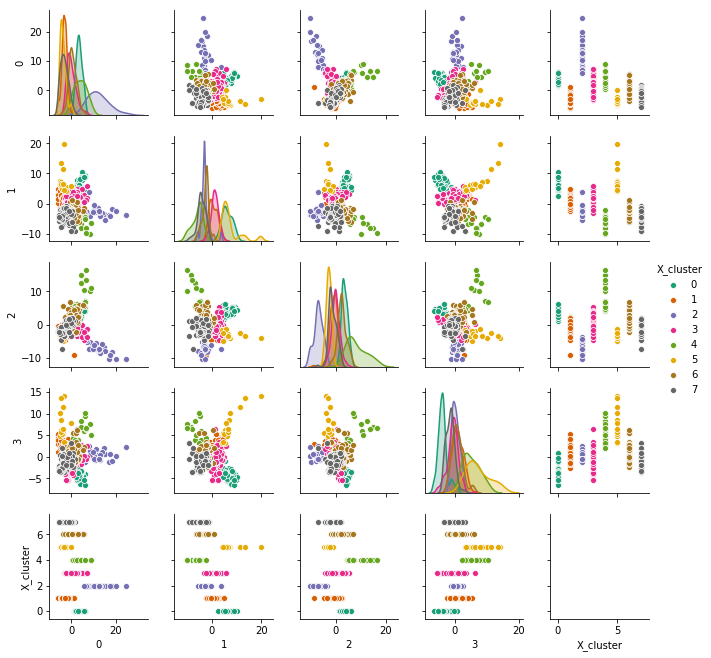

In [256]:
sns.pairplot(daily_clusters, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
#looks a lot like there's four distinct clusters - purple, goldenrod, green, and everything else?

## First thing Tuesday: REVISIT MEDIAN ROC APPROACH - does it still have legs across shorter time frames than a year? If you use it on altcoins over one month, do the results match up with what you found if you use it on the same coins for the previous month?

## Second thing: check Mitchell's suggestions for btc features - and definitely try that clustering by coin:USD thing that leaves btc in, that's a neat idea that would be pretty easy to take a whack at. 

## Then maybe knit sector names in to this set for easier testing of accuracy, if continuing with clustering. 

## The clustering is good for different sectors at different cluster numbers
At 8, for example, healthcare really pops out, but is lost at higher or lower cluster numbers
## Adding additional features - maybe the relationships between these sample dates - seems called for. Would be good if it were features universal to coins as well.
## Volume? Would have to knit that in to S&P data.
## Market cap? Same, would have to knit, but also available for coins.
## Try to stick with features that you already have available in the coin set! Spread, ratio, etc. That's pretty much volume and market cap, so there you go. 
